In [1]:
import numpy as np 
import matplotlib.pyplot as plt

The total rate at which energy is emitted by a blackbody is a function of temperature only and is given by the Stephan-Boltzman Law \
M(T) = $\sigma$ T^4 \
T is temperature \
M is the rate at which EM energy is emitted from the surface per meter squared Known as Exitance \
$\sigma$ Stephan-Boltzman constant 5.67*10^-8 W m^-2 K^-4

The Plank Distribution \
The intensity at which electromagnetic radion is emitted from a blackbody varies with frequency of the EM radiation. The relation is given by the Plank distribution

/tmp/ipykernel_333281/1503404611.py:7: RuntimeWarning: divide by zero encountered in divide
  return 2*np.pi*h*f**3/c**2 * 1/(np.exp(h*f/(k*T))-1)


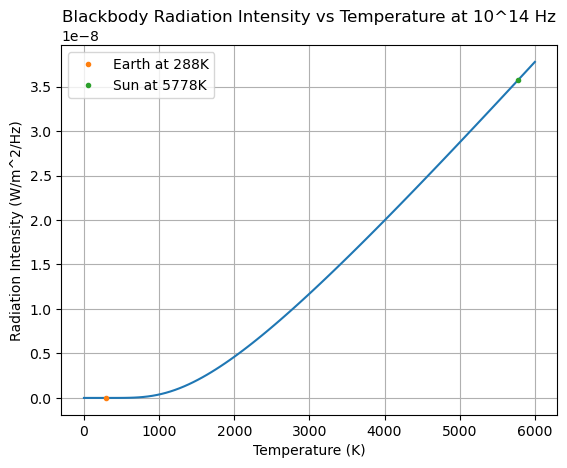

In [9]:
#Bulk Radiation analysis
h = 6.626*10**-34  # Planck's constant in J·s
c = 3.0*10**8    # Speed of light in m/s
k = 1.381*10**-23  # Boltzmann's constant in J/K
f = 1.0*10**14  # Frequency in Hz
def radiation_analysis(T):
    return 2*np.pi*h*f**3/c**2 * 1/(np.exp(h*f/(k*T))-1)  
T = np.linspace(0.0, 6000, 100)
R = radiation_analysis(T)
#print(R)
plt.plot(T, R)
plt.xlabel('Temperature (K)')
plt.ylabel('Radiation Intensity (W/m^2/Hz)')
plt.title('Blackbody Radiation Intensity vs Temperature at 10^14 Hz')
plt.grid()
plt.plot(288, radiation_analysis(288), '.',label='Earth at 288K')  # Example at 288K
plt.plot(5778, radiation_analysis(5778), '.',label='Sun at 5778K')  # Example at 5778K (Sun's surface temperature)
plt.legend()

Text(0.5, 1.0, 'Blackbody Radiation Intensity vs Frequency at 3000K')

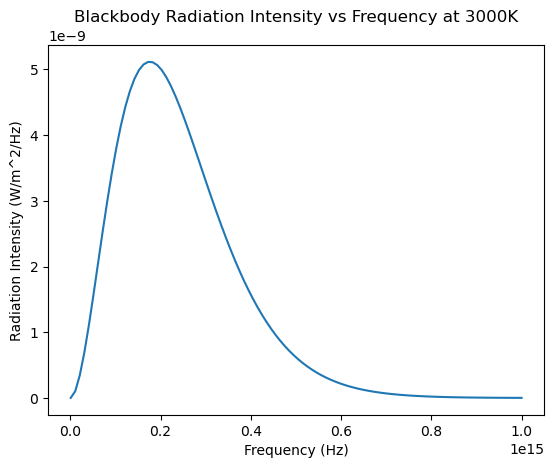

In [8]:
Temp = 3000  # Temperature in Kelvin
def radiation_analysis2(freq):
    return 2*h*freq**3/c**2 * 1/(np.exp(h*freq/(k*Temp))-1)
freq = np.linspace(1.0*10**12, 1.0*10**15, 100)
R2 = radiation_analysis2(freq)
#print(R2)
plt.plot(freq, R2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Radiation Intensity (W/m^2/Hz)')
plt.title('Blackbody Radiation Intensity vs Frequency at 3000K')

Spectral Exitance analysis 

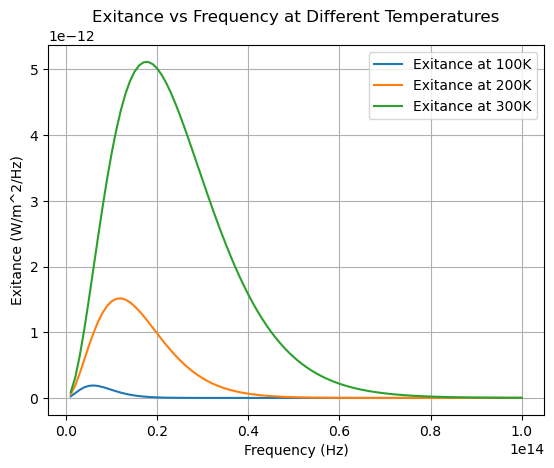

In [4]:
def exitance(T,freqs):
    M = 2*np.pi*h*freqs**3/c**2 * 1/(np.exp(h*freqs/(k*T))-1)
    B = 2*h*freqs**3/c**2 * 1/(np.exp(h*freqs/(k*T))-1)
    return M, B
freqs = np.linspace(1.0*10**12, 1.0*10**14, 100)
plt.plot(freqs, exitance(100, freqs)[1], label='Exitance at 100K')
plt.plot(freqs, exitance(200, freqs)[1], label='Exitance at 200K')
plt.plot(freqs, exitance(300, freqs)[1], label='Exitance at 300K')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Exitance (W/m^2/Hz)')
plt.title('Exitance vs Frequency at Different Temperatures')
plt.legend()
plt.grid()
plt.show()

Yes this agrees with Wein's displacement law as Lamda_max ~ 1/T 

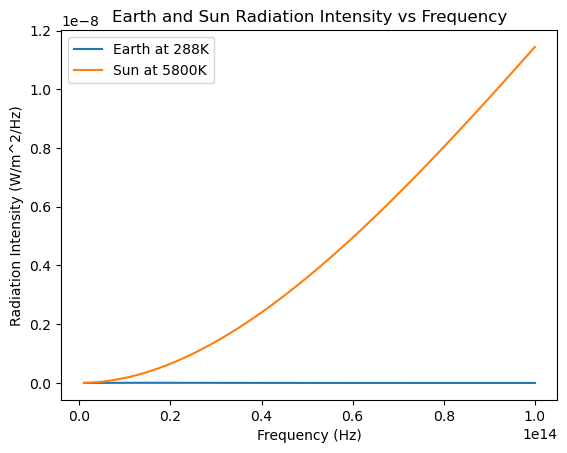

In [5]:
plt.plot(freqs,exitance(288, freqs)[1], label='Earth at 288K')
plt.plot(freqs,exitance(5800, freqs)[1], label='Sun at 5800K')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Radiation Intensity (W/m^2/Hz)')
plt.title('Earth and Sun Radiation Intensity vs Frequency')
plt.legend()


In [27]:
#BULK VS SPECTRUAL EMISSION
M_sol = exitance(5772,freqs=np.linspace(1.0*10**2, 1.0*10**16, 300))[0]
total_M_sol = np.trapezoid(M_sol, x=np.linspace(1.0*10**2, 1.0*10**16, 300))
print("Total Exitance of the Sun (W/m^2):", total_M_sol)
print("sigma*T^4:", 5.67e-8 * 5772**4)
print("The integrated exitance is close to the Stefan-Boltzmann law value.")

Total Exitance of the Sun (W/m^2): 62917235.988005705
sigma*T^4: 62934436.58666411
The integrated exitance is close to the Stefan-Boltzmann law value.
